# Contact Tracing Hitting Time Distributions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import scipy.stats as ss
import seaborn as sns
import household_contact_tracing as model
import warnings
warnings.filterwarnings('ignore')
sns.set()

## Contacts under surveillance

We condition on the event that the epidemic does not go extinct. The number of contacts that can be under surveillance is either 800 or 8000.

This is most relevent early in the outbreak, and we assume no social distancing

In [2]:
simulation = model.household_sim_contact_tracing(haz_rate_scale = 0.805,
                                                contact_tracing_success_prob = 2/3,
                                                prob_of_successful_contact_trace_today = 1/2,
                                                infection_reporting_prob = 0.7,
                                                reporting_delay_par = 1/4.8,
                                                contact_trace = True,
                                                reduce_contacts_by = 0.0) # 0.1 means a person makes 10% less contacts

In [3]:
%%time
npr.seed(1000)

observations_required = 5000

simulations_performed = 0

# Counting the number of times each capacity was hit
times_hit_800 = 0
times_hit_8000 = 0
timed_out_count = 0

# Empty lists to store the hitting times in
hitting_times_800 = []
hitting_times_8000 = []

# We condition on the event that we see the 8000 capacity hit
while times_hit_8000 != observations_required:
    
    simulations_performed += 1
    
    simulation.run_simulation_hitting_times(time_out = 150)
    
    if simulation.hit_800 == True:
        times_hit_800 += 1
        
    if simulation.hit_8000 == True:
        times_hit_8000 += 1
        
        # We condition on the event the simulation reached 8000 capacity
        hitting_times_800.append(simulation.time_800)
        hitting_times_8000.append(simulation.time_8000)
        
    if simulation.timed_out == True:
        timed_out_count += 1
        
    print(f"Simulations performed: {simulations_performed}, progress: {times_hit_8000}/{observations_required}, time outs: {timed_out_count}", end = "\r")

CPU times: user 7min 32s, sys: 21.9 s, total: 7min 54s outs: 192
Wall time: 7min 41s


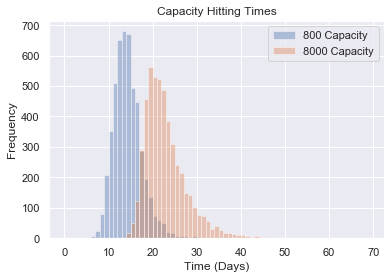

In [4]:
plot_800 = sns.distplot(hitting_times_800,
                        #fit = ss.gumbel_r,
                        bins = range(70),
                        kde = False
                       )
plot_8000 = sns.distplot(hitting_times_8000,
                         #fit = ss.gumbel_r,
                         bins = range(70),
                         kde = False
                        )
plt.title("Capacity Hitting Times")
plt.xlabel("Time (Days)")
plt.ylabel("Frequency")
plt.legend(("800 Capacity", "8000 Capacity"))

Text(0, 0.5, 'Frequency')

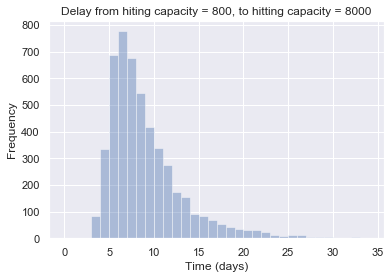

In [5]:
sns.distplot(np.array(hitting_times_8000) - np.array(hitting_times_800), kde = False, hist = True
            , bins = range(0,35)
            )
plt.title("Delay from hiting capacity = 800, to hitting capacity = 8000")
plt.xlabel("Time (days)")
plt.ylabel("Frequency")

Mean delay achieved from the increased capacity:

In [6]:
np.mean(np.array(hitting_times_8000) - np.array(hitting_times_800))

8.5782

In [7]:
np.mean(hitting_times_800)

13.8242

In [8]:
np.mean(hitting_times_8000)

22.4024

In [9]:
prob_hitting_800 = times_hit_800/simulations_performed*100
prob_hitting_800

80.81538461538462

In [10]:
prob_hitting_8000 = times_hit_8000/simulations_performed*100
prob_hitting_8000

76.92307692307693